In [1]:
!pip install datasets

In [2]:
pip install "numpy<2"

Note: you may need to restart the kernel to use updated packages.


In [3]:
from datasets import load_dataset
ds = load_dataset("SimulaMet-HOST/Kvasir-VQA")
ds

Resolving data files:   0%|          | 0/31 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/31 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/30 [00:00<?, ?it/s]

DatasetDict({
    raw: Dataset({
        features: ['image', 'source', 'question', 'answer', 'img_id'],
        num_rows: 58849
    })
})

In [4]:
idx= 10 # random index of a row
ds['raw'][idx]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=720x576>,
 'source': 'Ulcerative Colitis',
 'question': 'How many findings are present?',
 'answer': '1',
 'img_id': 'cla820gl0s3nv071u4fgd7xgq'}

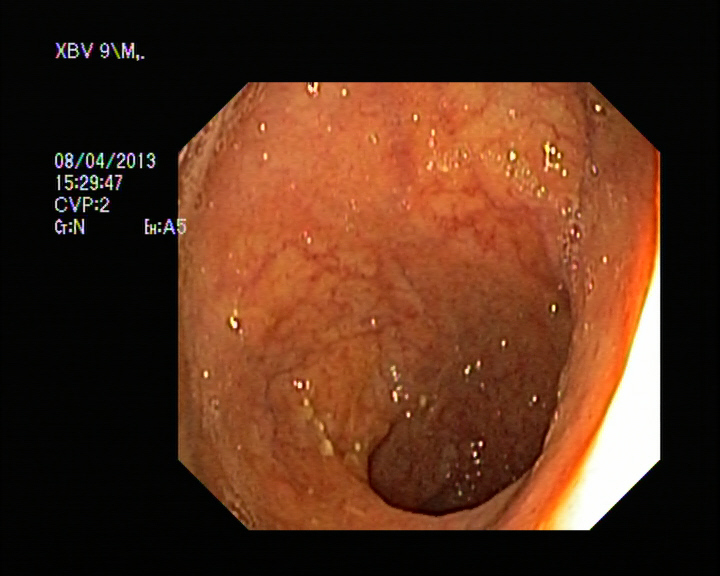

In [5]:
ds['raw'][idx]['image']

In [6]:
d_path ="./" #existing folder where you want to save images and metadata.csv
df = ds['raw'].select_columns(['source', 'question', 'answer', 'img_id']).to_pandas()
df.to_csv(f"{d_path}/metadata.csv", index=False)
df

,source,question,answer,img_id
0,Ulcerative Colitis,Are there any abnormalities in the image? Chec...,ulcerative colitis,cla820gl0s3nv071u4fgd7xgq
1,Ulcerative Colitis,Are there any anatomical landmarks in the imag...,none,cla820gl0s3nv071u4fgd7xgq
2,Ulcerative Colitis,Are there any instruments in the image? Check ...,none,cla820gl0s3nv071u4fgd7xgq
3,Ulcerative Colitis,Have all polyps been removed?,not relevant,cla820gl0s3nv071u4fgd7xgq
4,Ulcerative Colitis,Is this finding easy to detect?,yes,cla820gl0s3nv071u4fgd7xgq
...,...,...,...,...
58844,Instrument,none,nan,clb0lbx01dpv4086u0m8405q9
58845,Instrument,none,nan,clb0lbx02dpwg086uenmd1sqy
58846,Instrument,none,nan,clb0lbx07dq6s086ufm8v2qnu
58847,Instrument,none,nan,clb0lbx1ndqps086u6is88lmw


In [7]:
num_classes = df["answer"].nunique()
print(f"Nombre de classes : {num_classes}")

Nombre de classes : 502


In [8]:
import os
os.makedirs(f"{d_path}/images", exist_ok=True)

for i, row in df.groupby('img_id').nth(0).iterrows(): #for images
  image = ds['raw'][i]['image'].save(f"{d_path}/images/{row['img_id']}.jpg")

In [9]:
!pip install torch torchvision pandas datasets matplotlib

In [10]:
df

,source,question,answer,img_id
0,Ulcerative Colitis,Are there any abnormalities in the image? Chec...,ulcerative colitis,cla820gl0s3nv071u4fgd7xgq
1,Ulcerative Colitis,Are there any anatomical landmarks in the imag...,none,cla820gl0s3nv071u4fgd7xgq
2,Ulcerative Colitis,Are there any instruments in the image? Check ...,none,cla820gl0s3nv071u4fgd7xgq
3,Ulcerative Colitis,Have all polyps been removed?,not relevant,cla820gl0s3nv071u4fgd7xgq
4,Ulcerative Colitis,Is this finding easy to detect?,yes,cla820gl0s3nv071u4fgd7xgq
...,...,...,...,...
58844,Instrument,none,nan,clb0lbx01dpv4086u0m8405q9
58845,Instrument,none,nan,clb0lbx02dpwg086uenmd1sqy
58846,Instrument,none,nan,clb0lbx07dq6s086ufm8v2qnu
58847,Instrument,none,nan,clb0lbx1ndqps086u6is88lmw


In [11]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
import torch.nn as nn
import torchvision
from transformers import BertModel, BertTokenizer
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torch.utils.data import DataLoader, random_split
import re
from nltk.corpus import stopwords
import nltk
import spacy
from PIL import Image
from datasets import load_dataset
from tqdm import tqdm
import torchvision.transforms as T
import torch.nn.functional as F

In [12]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gimsg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
!pip install scispacy
!pip install https://github.com/allenai/scispacy/releases/download/v0.5.2/en_core_sci_sm-0.5.2.tar.gz

  ERROR: HTTP error 404 while getting https://github.com/allenai/scispacy/releases/download/v0.5.2/en_core_sci_sm-0.5.2.tar.gz
ERROR: Could not install requirement https://github.com/allenai/scispacy/releases/download/v0.5.2/en_core_sci_sm-0.5.2.tar.gz because of HTTP error 404 Client Error: Not Found for url: https://github.com/allenai/scispacy/releases/download/v0.5.2/en_core_sci_sm-0.5.2.tar.gz for URL https://github.com/allenai/scispacy/releases/download/v0.5.2/en_core_sci_sm-0.5.2.tar.gz


In [14]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.8 MB 1.2 MB/s eta 0:00:11
     -- ------------------------------------ 0.8/12.8 MB 763.2 kB/s eta 0:00:16
     -- ------------------------------------ 0.8/12.8 MB 763.2 kB/s eta 0:00:16
     -- ------------------------------------ 0.8/12.8 MB 763.2 kB/s eta 0:00:16
     --- ----------------------------------- 1.0/12.8 MB 613.9 kB/s eta 0:00:20
     --- ----------------------------------- 1.0/12.8 MB 613.9 kB/s eta 0:00:20
     --- ----------------------------------- 1.0/12.8 MB 613.9 kB/s eta 0:00:20
     --- ----------------------------------- 1.3/12.8 MB 550.1 kB/s eta 0:

In [15]:
import spacy
nlp = spacy.load("en_core_web_sm")

# **Pre-processing steps**

In [54]:
#Fonction de nettoyage de texte
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Supprimer caractères spéciaux
    text = text.lower()
        # Remplacer les formats "11-20mm" → "taille_11_20mm"
    text = re.sub(r'(\d+)-(\d+)', r'taille_\1_\2', text)
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc if not token.is_stop])
    return lemmatized_text

#Classe pour les données images et texte
class CustomImageDataset(Dataset):
    def __init__(self, img_folder, metadata_csv, transform=None, tokenizer=None, sample_size=None, max_length=128):
        self.img_folder = img_folder
        self.metadata = pd.read_csv(metadata_csv)

        #Supprimer les valeurs non-string dans 'answer'
        self.metadata = self.metadata[self.metadata['answer'].apply(lambda x: isinstance(x, str))]

        #Convertir les réponses en minuscules
        self.metadata['answer'] = self.metadata['answer'].str.lower()

        if sample_size is not None and sample_size < len(self.metadata):
            self.metadata = self.metadata.sample(n=sample_size, random_state=42).reset_index(drop=True)

        self.transform = transform
        self.tokenizer = tokenizer
        self.max_length = max_length

        unique_answers = set(self.metadata['answer'])
        sorted_answers = sorted(unique_answers)
        self.label_map = {label: idx for idx, label in enumerate(sorted_answers)}

        self.metadata['encoded_label'] = self.metadata['answer'].map(self.label_map)

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_folder, f"{self.metadata.iloc[idx]['img_id']}.jpg")
        image = Image.open(img_name).convert('RGB')
        label = self.metadata.iloc[idx]['encoded_label']

        if self.transform:
            image = self.transform(image)

        question = clean_text(self.metadata.iloc[idx]['question'])

        question_tokens = self.tokenizer(
            question,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )

        answer = self.metadata.iloc[idx]['answer']
        return image, label, question_tokens, answer

In [17]:
#Preprocessing steps for the images (ResNet18)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  #ResNet normalization entre 0 et 1
])

In [18]:
#Initialiser le tokenizer BERT for Questions
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [33]:
from torch.utils.data import DataLoader, random_split
import torch
img_folder = r"C:\Users\gimsg\Downloads\images"
metadata_csv = r"C:\Users\gimsg\Downloads\metadata.csv"

# Initialisation du dataset
dataset = CustomImageDataset(
    img_folder=img_folder,
    metadata_csv=metadata_csv,
    transform=transform,
    tokenizer=tokenizer,
    sample_size=7000)

# Définir les proportions
total_size = len(dataset)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size  # Pour compenser les arrondis

# Split avec seed pour reproductibilité
generator = torch.Generator().manual_seed(42)
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size], generator=generator)

# DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)


In [34]:
#Convertir le dataset d'entraînement en DataFrame
train_df = dataset.metadata.copy()
#Affichage des premières lignes de train et validation
print("Dataset d'entraînement et de validation:")
train_df.head()

Dataset d'entraînement et de validation:


,source,question,answer,img_id,encoded_label
0,Instrument,Is there a green/black box artefact?,yes,clb0lbwyydol8086u0pvl1o37,205
1,Polyps,Have all polyps been removed?,no,cl8k2u1ps1dzz083243a1aigt,134
2,Polyps,Where in the image is the abnormality?,center; center-right; lower-right; upper-right,cl8k2u1q31egj08320u98dp6e,97
3,Instrument,Is there text?,yes,clb0lbwyudoig086uav6q2f4t,205
4,Instrument,How many findings are present?,2,clb0lbwz5dos0086u617xg3c6,5


In [35]:
print(train_df.shape)

(7000, 5)


In [36]:
#dataset.label_map
#nombre de lignes dans le dataset
num_rows_in_dataset = len(dataset.metadata)
print("Number of rows in the dataset:", num_rows_in_dataset)
#val_dataset_encoded
#convert to dataframe
#ttt = val_dataset_encoded.to_pandas()
#ttt

Number of rows in the dataset: 7000


In [37]:
#Vérify: que le DataLoader fonctionne et que la question est bien tokenisée
for images, labels, question_tokens, answers in train_dataloader:
    print('Les dimensions des images et labels')
    print(images.shape, labels.shape)  #Affiche les dimensions des images et labels
    print('----------------------')
    print('Les tokens de la question')
    print(question_tokens)  #Affiche les tokens de la question
    print('----------------------')
    print('Afficher les labels=answers')
    print(labels) #pour vérifier leur format (=32 dans le tensor)
    break  #Afficher les premiers lots pour vérifier

Les dimensions des images et labels
torch.Size([8, 3, 224, 224]) torch.Size([8])
----------------------
Les tokens de la question
{'input_ids': tensor([[[  101,  3746, 19470,  ...,     0,     0,     0]],

        [[  101, 26572,  2361,  ...,     0,     0,     0]],

        [[  101, 19470,  3012,  ...,     0,     0,     0]],

        ...,

        [[  101,  2946, 26572,  ...,     0,     0,     0]],

        [[  101, 16021, 24456,  ...,     0,     0,     0]],

        [[  101,  6602,  3746,  ...,     0,     0,     0]]]), 'token_type_ids': tensor([[[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]]]), 'attention_mask': tensor([[[1, 1, 1,  ..., 0, 0, 0]],

        [[1, 1, 1,  ..., 0, 0, 0]],

        [[1, 1, 1,  ..., 0, 0, 0]],

        ...,

        [[1, 1, 1,  ..., 0, 0, 0]],

        [[1, 1, 1,  ..., 0, 0, 0]],

   

In [38]:
#Verify: that the DataLoader works and that the question is tokenized correctly
for images, labels, question_tokens, answers in test_dataloader:
    print('Les dimensions des images et labels')
    print(images.shape, labels.shape)  # Affiche les dimensions des images et labels
    print('----------------------')

    print('Les tokens de la question')
    print(question_tokens)  # Affiche les tokens de la question
    print('----------------------')

    # Map numeric labels back to categorical answers
    label_to_answer = {v: k for k, v in dataset.label_map.items()}  # Invert label_map to get answer from label
    categorical_answers = [label_to_answer[label.item()] for label in labels]  # Convert labels to answers

    print('Afficher les labels=answers')
    print(categorical_answers)  # Affiche les answers en format texte
    print('----------------------')

    break  # Affiche les premiers lots pour vérifier


Les dimensions des images et labels
torch.Size([8, 3, 224, 224]) torch.Size([8])
----------------------
Les tokens de la question
{'input_ids': tensor([[[  101,  3746,  6602,  ...,     0,     0,     0]],

        [[  101,  3746,  6602,  ...,     0,     0,     0]],

        [[  101,  2828, 26572,  ...,     0,     0,     0]],

        ...,

        [[  101,  2828,  7709,  ...,     0,     0,     0]],

        [[  101,  3793,   102,  ...,     0,     0,     0]],

        [[  101,  2828, 26572,  ...,     0,     0,     0]]]), 'token_type_ids': tensor([[[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]]]), 'attention_mask': tensor([[[1, 1, 1,  ..., 0, 0, 0]],

        [[1, 1, 1,  ..., 0, 0, 0]],

        [[1, 1, 1,  ..., 0, 0, 0]],

        ...,

        [[1, 1, 1,  ..., 0, 0, 0]],

        [[1, 1, 1,  ..., 0, 0, 0]],

   

In [39]:
#Verify: that the DataLoader works and that the question is tokenized correctly
for images, labels, question_tokens, answers in test_dataloader:
    print('Les dimensions des images et labels')
    print(images.shape, labels.shape)  # Affiche les dimensions des images et labels
    print('----------------------')

    print('Les tokens de la question')
    print(question_tokens)  # Affiche les tokens de la question
    print('----------------------')

    # Map numeric labels back to categorical answers
    label_to_answer = {v: k for k, v in dataset.label_map.items()}  # Invert label_map to get answer from label
    categorical_answers = [label_to_answer[label.item()] for label in labels]  # Convert labels to answers

    print('Afficher les labels=answers')
    print(categorical_answers)  # Affiche les answers en format texte
    print('----------------------')

    break  # Affiche les premiers lots pour vérifier

Les dimensions des images et labels
torch.Size([8, 3, 224, 224]) torch.Size([8])
----------------------
Les tokens de la question
{'input_ids': tensor([[[  101,  3746,  6602,  ...,     0,     0,     0]],

        [[  101,  3746,  6602,  ...,     0,     0,     0]],

        [[  101,  2828, 26572,  ...,     0,     0,     0]],

        ...,

        [[  101,  2828,  7709,  ...,     0,     0,     0]],

        [[  101,  3793,   102,  ...,     0,     0,     0]],

        [[  101,  2828, 26572,  ...,     0,     0,     0]]]), 'token_type_ids': tensor([[[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]]]), 'attention_mask': tensor([[[1, 1, 1,  ..., 0, 0, 0]],

        [[1, 1, 1,  ..., 0, 0, 0]],

        [[1, 1, 1,  ..., 0, 0, 0]],

        ...,

        [[1, 1, 1,  ..., 0, 0, 0]],

        [[1, 1, 1,  ..., 0, 0, 0]],

   

**Pre-Processing DONE** ✅

# **Define the model Feature Extraction + Fusion + Classification**

In [40]:
#Mobilenetv2 + BioClinical Bert
class VQAModel(nn.Module):
    def __init__(self, num_labels, label_map=None):
        super(VQAModel, self).__init__()

        # Image model: MobileNetV2 (pre-trained)
        self.mobilenet = torchvision.models.mobilenet_v2(weights=torchvision.models.MobileNet_V2_Weights.DEFAULT)
        self.mobilenet.classifier[1] = nn.Identity()  # Remove the final classification layer
        mobilenet_output_size = 1280  # Output size of MobileNetV2

        # Text model: BioClinical BERT (pre-trained)
        self.bert = BertModel.from_pretrained('dmis-lab/biobert-base-cased-v1.1')  # Replaced BERT with BioClinicalBERT
        bert_output_size = 768  # Output size of BioClinicalBERT

        # MLP for final classification
        self.fc = nn.Sequential(
            nn.Linear(mobilenet_output_size + bert_output_size, 512),  #Fusion of image + text features
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_labels)  #Output layer for classification
        )

        # Optional dictionary to convert labels to categories
        self.label_map = label_map

    def forward(self, image, question_tokens):
        # Extract image features using MobileNetV2
        image_features = self.mobilenet(image)
        image_features = image_features.view(image_features.size(0), -1)  # Flatten the features

        # Extract text features using BioClinicalBERT
        if 'input_ids' in question_tokens and 'attention_mask' in question_tokens:
            input_ids = question_tokens['input_ids']
            attention_mask = question_tokens['attention_mask']
            if input_ids.dim() == 3:  # Case where there is an extra dimension (batch_size, 1, seq_length)
                input_ids = input_ids.squeeze(1)
                attention_mask = attention_mask.squeeze(1)
        else:
            raise ValueError("Keys 'input_ids' and 'attention_mask' are missing from question_tokens.")

        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        text_features = bert_output.pooler_output

        # Concatenate image and text features
        combined_features = torch.cat((image_features, text_features), dim=1)

        # Pass through MLP for final prediction
        output = self.fc(combined_features)

        return output


In [41]:
!pip install transformers torch

In [42]:
#Select hyperparameters
num_labels = len(dataset.label_map)  #Number of unique labels (answers)
label_map = dataset.label_map  #Pass label_map for converting numeric labels back to categorical answers

#Initialize the model
model = VQAModel(num_labels=num_labels, label_map=label_map)

In [43]:
print(dataset.label_map)

{'0': 0, '1': 1, '11-20mm': 2, '11-20mm;<5mm': 3, '16': 4, '2': 5, '3': 6, '4': 7, '5': 8, '5-10mm': 9, '5-10mm;<5mm': 10, '5-10mm;>20mm': 11, '<5mm': 12, '>20': 13, '>20mm': 14, 'barretts; oesophagitis': 15, 'biopsy forceps': 16, 'black': 17, 'black; white': 18, 'blue; green': 19, 'cecum': 20, 'center': 21, 'center-left; center-right; lower-center; lower-left; lower-rigth; upper-center; upper-left; upper-right': 22, 'center-left; lower-center; lower-left': 23, 'center-left; lower-center; lower-left; upper-center; upper-left': 24, 'center-left; lower-center; lower-left; upper-left': 25, 'center-left; lower-left; upper-center; upper-left; upper-right': 26, 'center-left; lower-left; upper-left': 27, 'center-left; upper-center': 28, 'center-left; upper-center; upper-left': 29, 'center-left; upper-left': 30, 'center-right': 31, 'center-right; lower-center; lower-left; lower-rigth; upper-center; upper-left; upper-right': 32, 'center-right; lower-center; lower-right; upper-right': 33, 'cente

In [44]:
print(num_labels) #for sous ensemble utilisé

207


# **Training the model**

In [45]:
print("PyTorch version:", torch.__version__)
print("CUDA disponible ?", torch.cuda.is_available())
print("Nombre de GPUs :", torch.cuda.device_count())
if torch.cuda.is_available():
    print("Nom du GPU :", torch.cuda.get_device_name(0))
    print("Mémoire totale :", torch.cuda.get_device_properties(0).total_memory / (1024**3), "Go")

PyTorch version: 2.7.0+cu118
CUDA disponible ? True
Nombre de GPUs : 1
Nom du GPU : NVIDIA GeForce RTX 2050
Mémoire totale : 3.99957275390625 Go


In [50]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation du : {device}")
scaler = GradScaler("cuda") if device.type == "cuda" else None

if device.type == "cuda":
    print("Nom du GPU :", torch.cuda.get_device_name(0))
    print("VRAM libre:", round(torch.cuda.mem_get_info()[0]/1024**3, 1), "Go")

Utilisation du : cuda
Nom du GPU : NVIDIA GeForce RTX 2050
VRAM libre: 1.0 Go


In [51]:

import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torch.amp import autocast, GradScaler
from sklearn.metrics import accuracy_score
from torch.cuda.amp import autocast, GradScaler
from torch.amp import autocast, GradScaler

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-5)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=1
)

# Métriques
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Hyperparamètres
epochs = 5


model.to(device)  # Envoie tout le modèle sur le bon device

for epoch in range(epochs):
    model.train()
    running_train_loss = 0.0
    all_train_preds = []
    all_train_labels = []

    for images, labels, question_tokens, answers in train_dataloader:
        images = images.to(device).to(torch.float32)  # MobileNetV2 attend float32
        labels = labels.to(device)
        question_tokens = {k: v.to(device) for k, v in question_tokens.items()}

        optimizer.zero_grad()

        if scaler is not None:
            with autocast(device_type="cuda"):
                outputs = model(images, question_tokens)
                loss = criterion(outputs, labels)

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            outputs = model(images, question_tokens)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        optimizer.zero_grad(set_to_none=True)

        running_train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        all_train_preds.extend(preds.cpu().numpy())
        all_train_labels.extend(labels.cpu().numpy())

    train_accuracy = accuracy_score(all_train_labels, all_train_preds)
    train_losses.append(running_train_loss / len(train_dataloader))
    train_accuracies.append(train_accuracy)

    # Phase de validation
    model.eval()
    running_val_loss = 0.0
    all_val_preds = []
    all_val_labels = []

    with torch.no_grad():
        for images, labels, question_tokens, answers in val_dataloader:
            images = images.to(device).to(torch.float32)
            labels = labels.to(device)
            question_tokens = {k: v.to(device) for k, v in question_tokens.items()}

            outputs = model(images, question_tokens)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            all_val_preds.extend(preds.cpu().numpy())
            all_val_labels.extend(labels.cpu().numpy())

    val_accuracy = accuracy_score(all_val_labels, all_val_preds)
    val_losses.append(running_val_loss / len(val_dataloader))
    val_accuracies.append(val_accuracy)

    scheduler.step(val_losses[-1])

    print(f"Epoch {epoch + 1}/{epochs}: "
          f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]*100:.2f}%, "
          f"Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]*100:.2f}%")

# ==================== SAUVEGARDE DU MODÈLE APRÈS ENTREÎNEMENT ====================
import os

model_dir = "./saved_models"
os.makedirs(model_dir, exist_ok=True)

model_path = os.path.join(model_dir, "best_vqa_model.pth")

torch.save({
    'model_state_dict': model.state_dict(),
    'label_map': dataset.label_map,
    'num_labels': num_labels
}, model_path)

print(f"\n✅ Modèle sauvegardé avec succès à : {model_path}")

Epoch 1/5: Train Loss: 2.3044, Train Accuracy: 51.71%, Val Loss: 1.2998, Val Accuracy: 70.00%
Epoch 2/5: Train Loss: 1.2115, Train Accuracy: 70.23%, Val Loss: 1.0030, Val Accuracy: 72.00%
Epoch 3/5: Train Loss: 0.9848, Train Accuracy: 75.48%, Val Loss: 0.8725, Val Accuracy: 78.00%
Epoch 4/5: Train Loss: 0.8583, Train Accuracy: 78.89%, Val Loss: 0.8015, Val Accuracy: 80.00%
Epoch 5/5: Train Loss: 0.7792, Train Accuracy: 79.50%, Val Loss: 0.7763, Val Accuracy: 80.29%

✅ Modèle sauvegardé avec succès à : ./saved_models\best_vqa_model.pth


In [52]:
from sklearn.metrics import classification_report, confusion_matrix

model.eval()
all_test_preds = []
all_test_labels = []

with torch.no_grad():
    for images, labels, question_tokens, answers in test_dataloader:
        images = images.to(device)
        labels = labels.to(device)
        question_tokens = {k: v.to(device) for k, v in question_tokens.items()}

        outputs = model(images, question_tokens)
        _, preds = torch.max(outputs, 1)
        all_test_preds.extend(preds.cpu().numpy())
        all_test_labels.extend(labels.cpu().numpy())

# Affichage des résultats
test_accuracy = accuracy_score(all_test_labels, all_test_preds)
print(f"\n Test Accuracy: {test_accuracy * 100:.2f}%")



 Test Accuracy: 83.29%


In [53]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Calcul de l'accuracy
accuracy = accuracy_score(all_test_labels, all_test_preds)

# Calcul des autres métriques (precision, recall, f1-score, avec la moyenne pondérée)
precision, recall, f1, _ = precision_recall_fscore_support(all_test_labels, all_test_preds, average='weighted')

# Affichage des résultats
print("Results of Mobilenetv2 + BioBERT")
print(f" Test Accuracy: {accuracy * 100:.2f}%")
print(f" Test Precision: {precision* 100:.2f}%")
print(f" Test F1-Score: {f1* 100:.2f}%")

Results of Mobilenetv2 + BioBERT
 Test Accuracy: 83.29%
 Test Precision: 77.25%
 Test F1-Score: 79.40%


C:\Users\gimsg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gimsg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [56]:
# Nettoyer les réponses médicales
df['cleaned_answer'] = df['answer'].astype(str).apply(clean_text)

# Supprimer les réponses vides ou inutiles
df = df[df['cleaned_answer'] != "inconnu"]

In [57]:
# Récupère les réponses uniques après nettoyage
unique_answers = sorted(set(df['cleaned_answer']))

# Créer label_map : {"answer": idx}
label_map = {ans: idx for idx, ans in enumerate(unique_answers)}

# Sauvegarder dans un fichier JSON
import json

with open("label_map.json", "w") as f:
    json.dump(label_map, f, indent=2)
print("✅ label_map.json généré avec succès")

✅ label_map.json généré avec succès


In [58]:
config = {
    "model_name": "VQAModel",
    "vision_model": "mobilenet_v2",
    "nlp_model": "dmis-lab/biobert-base-cased-v1.1",
    "num_labels": len(label_map),
    "image_size": [224, 224],
    "max_length": 128,
    "label_map_path": "label_map.json",
    "model_path": "saved_models/best_vqa_model.pth"
}

with open("config.json", "w") as f:
    json.dump(config, f, indent=2)
print("✅ config.json généré avec succès")

✅ config.json généré avec succès
